Importing libraraies

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data collection and processssing

In [130]:
#load the dataset to pandas data frame.
df=pd.read_csv('train.csv')

In [131]:
titanic_data=df

In [132]:
#printing the first 10 rows of the data frame
titanic_data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


titani_data.shape--> gives (no. of rows, no. of columns)
here we can see the target column is 'survival' and all other rest columns are features...so we have 11 features

In [133]:
titanic_data.shape

(891, 12)

In [134]:
titanic_data.info


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [135]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [136]:
# how many missing values present in which column
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
#we can see there are 687 missing values from cabin so lets drop that column
titaic_data = titanic_data.drop(columns='Cabin', axis = 1)

In [138]:
#replace the missing values in age with the mean of it
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [139]:
#replaceing the missing value in emabrked with the most repetative one
#first lets find which port destination is the most repetative

In [140]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [141]:
print(titanic_data['Embarked'].mode()[0])

S


In [142]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0] , inplace = True)

In [143]:
#its replcaed, lets check whether it is replaced or not
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [144]:
titaic_data = titanic_data.drop(columns='Cabin', axis = 1)

In [145]:
titanic_data.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [146]:
titaic_data = titanic_data.drop(columns='Cabin')

In [147]:
titanic_data.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [148]:
titanic_data = titanic_data.drop(columns='Cabin')

In [149]:
titanic_data.isnull().sum()



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DATA ANALYSIS

In [150]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [151]:
#here 25%=22 refers that 25% of the data are below that value(22)..
#same as 50 and others


In [152]:
#find the no. of people survive and not survived

In [153]:
titaic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [154]:
sns.set()

sns.set() is used for better data visualization provided by the seaborn libraries., whenever used, it activates the default seaborn settings

In [155]:
#a count plot for survived column

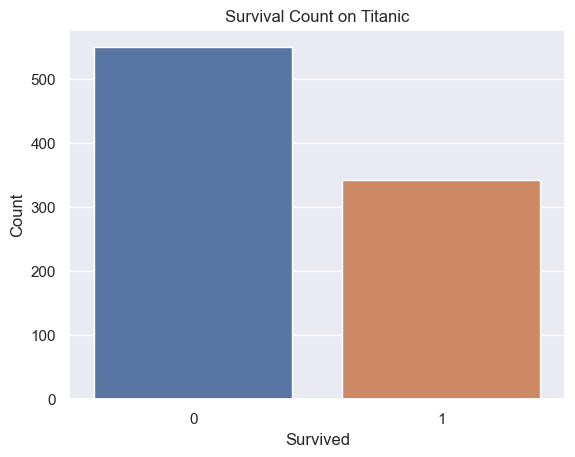

In [156]:
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=titanic_data)

# Adding optional title and labels for better visualization
plt.title('Survival Count on Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()


In [157]:
#lets find the no of survivors acc to genders.

<AxesSubplot: xlabel='Sex', ylabel='count'>

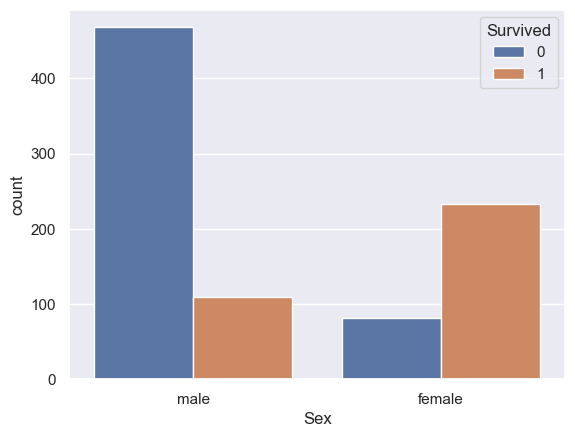

In [158]:
sns.countplot(x='Sex' , hue='Survived', data=titanic_data)

In [159]:
#so we saw that no. of females who was saved >> no. of males survived.

In [160]:
#now, lets see acc. to P-class

<AxesSubplot: xlabel='Pclass', ylabel='count'>

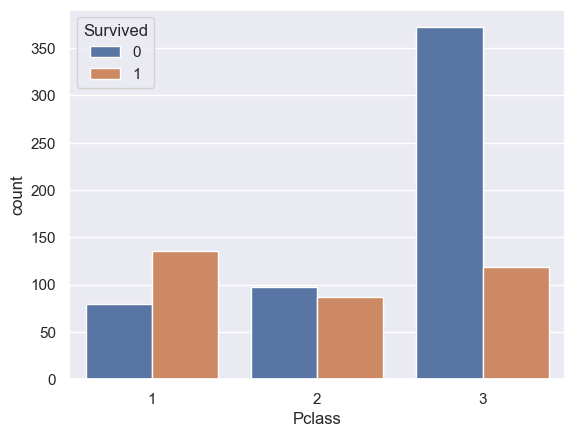

In [161]:
sns.countplot(x='Pclass' , hue='Survived', data=titanic_data)

In [162]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [163]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [164]:
#converting categorical data to numerical values

In [165]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}} , inplace =True)

In [166]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [167]:
titanic_data.head(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0


separating features and target

In [168]:
X = titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1) #dropping pasenger id,name,ticket as they arent categorical data and dropping survived to remove the target
Y = titanic_data['Survived']

In [169]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [170]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [171]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [172]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


Model Training

In [173]:
#Logistic Regresison

In [174]:
from sklearn.linear_model import LogisticRegression


In [175]:
model=LogisticRegression()

In [176]:
model.fit(X_train,Y_train)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [177]:
#accuracy on training data

In [178]:
X_train_prediction=model.predict(X_train)

#this function will go through the data of x_train and will make prediction
#whether they survived or not.

In [179]:
print(X_train_prediction)

[0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 

In [180]:
#these are teh prediction but we need to compare with the original value


In [181]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [182]:
print(training_data_accuracy)

0.8089887640449438


In [183]:
#so we got 80% accurate prediction., means when u predict out of 100, this model will predict 80 predictions correctly

In [184]:
#now test data is left, so we apply accuracy score on Test Data

In [185]:
X_test_prediction=model.predict(X_test)


In [186]:
print(X_test_prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


In [187]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [188]:
print(test_data_accuracy)

0.770949720670391


SO, We got approx as 79% accuracy from the training and testing and hence we can say that this module is suitable for the survival prediction.